### Atlas Scientific pH  
pH Sensor for measuring acidity (hydrogen ion concentration) of liquids  

Manufacturer Link: https://www.atlas-scientific.com/ph.html  

In [1]:
import matplotlib.pyplot as plt

from meerkat.base import time
from meerkat import atlas, parser

In [2]:
# instance device and set output format to .csv (which is default)
dev = atlas.pH(bus_n=1, output='csv')

#### Configuration

In [3]:
# device information: device type, firmware version
time.sleep(0.5)
dev.info()

('pH', '1.7')

In [4]:
# status of device power: restart code, input voltage Vcc
time.sleep(0.5)
dev.status()

('P', 5.02)

In [5]:
# set current temperature for compensation
time.sleep(0.5)
dev.temp_set(24.4)
time.sleep(0.5)
dev.temp_get()

24.39

#### Calibration

In [6]:
# Three point calibration
dev.cal_set_mid(7.00)
time.sleep(1)
dev.cal_set_low(3.00)
time.sleep(1)
dev.cal_set_high(10.09)
time.sleep(1)
dev.cal_get()

3

In [7]:
# clear calibration
time.sleep(1)
dev.cal_clear()
time.sleep(1)
dev.cal_get()

0

In [8]:
# response breakdown of calibration
time.sleep(0.5)
dev.cal_slope()

(99.9, 99.9)

#### Measurement

In [9]:
# single pH measurement
time.sleep(0.5)
dev.measure()

0.0

In [10]:
# get one sample without a description
dev.get('test_1')

['test_1', 0, 0.0]

In [11]:
# get 5 samples with a description
dev.get('test_2', n=5)

[['test_2', 0, 0.0],
 ['test_2', 1, 0.0],
 ['test_2', 2, 0.0],
 ['test_2', 3, 0.0],
 ['test_2', 4, 0.0]]

#### JSON Data Publishing    

In [12]:
# set the metadata publishing interval to every third sample
dev.json_writer.metadata_interval = 3

In [13]:
dev.publish(description='test_3', n=5)

['{"description": "test_3", "sample_n": 0, "pH": 0.0, "std_time_ms": "2020-12-10 19:47:22.715509"}',
 '{"description": "test_3", "sample_n": 1, "pH": 0.0, "std_time_ms": "2020-12-10 19:47:25.169729"}',
 '{"description": "test_3", "sample_n": 2, "pH": 0.0, "std_time_ms": "2020-12-10 19:47:27.623878", "encoding": "utf-8", "format": "text/json", "standard": "RFC 8259", "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "metadata": {"name": "atlas_ph", "urls": "www.atlas-scientific.com/ph.html", "manufacturer": "Atlas Scientific", "header": ["description", "sample_n", "pH"], "dtype": ["str", "int", "float"], "units": [null, "count", "pH units"], "accuracy": [null, 1, "+/-0.002"], "precision": [null, 1, 0.001], "bus_n": 1, "bus_addr": 99, "description": "Atlas pH"}, "time_source": "std_time_ms", "time_format": "%Y-%m-%d %H:%M:%S.%f", "metadata_interval": 3}',
 '{"description": "test_3", "sample_n": 3, "pH": 0.0,

#### CSV Writer Output

In [14]:
# write 5 samples to .csv file with description
dev.write(description='test_4', n=5)

In [15]:
# name of file written
dev.csv_writer.path

'2020_12_10_19_47_35_atlas_ph.csv'

In [16]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

In [17]:
df

,std_time_ms,description,sample_n,pH,datetime64_ns
0,2020-12-10 19:47:35.019769,test_4,0,0.0,2020-12-10 19:47:35.019769
1,2020-12-10 19:47:37.474073,test_4,1,0.0,2020-12-10 19:47:37.474073
2,2020-12-10 19:47:39.928470,test_4,2,0.0,2020-12-10 19:47:39.928470
3,2020-12-10 19:47:42.382889,test_4,3,0.0,2020-12-10 19:47:42.382889
4,2020-12-10 19:47:44.837274,test_4,4,0.0,2020-12-10 19:47:44.837274


In [18]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack

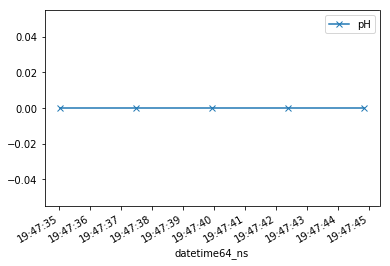

In [19]:
df[["datetime64_ns", "pH"]].plot(x="datetime64_ns", style='-x');

#### JSON Writer Output

In [20]:
dev.writer_output = "json"

In [21]:
# get 7 samples with a description
dev.write(description='test_5', n=7)

In [22]:
# name of file written
dev.json_writer.path

'2020_12_10_19_47_48_atlas_ph.jsontxt'

In [23]:
!head $dev.json_writer.path

{"description": "test_5", "sample_n": 0, "pH": 0.0, "std_time_ms": "2020-12-10 19:47:48.004082"}
{"description": "test_5", "sample_n": 1, "pH": 0.0, "std_time_ms": "2020-12-10 19:47:50.458519"}
{"description": "test_5", "sample_n": 2, "pH": 0.0, "std_time_ms": "2020-12-10 19:47:52.913051", "encoding": "utf-8", "format": "text/json", "standard": "RFC 8259", "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "metadata": {"name": "atlas_ph", "urls": "www.atlas-scientific.com/ph.html", "manufacturer": "Atlas Scientific", "header": ["description", "sample_n", "pH"], "dtype": ["str", "int", "float"], "units": [null, "count", "pH units"], "accuracy": [null, 1, "+/-0.002"], "precision": [null, 1, 0.001], "bus_n": 1, "bus_addr": 99, "description": "Atlas pH"}, "path": "2020_12_10_19_47_48_atlas_ph.jsontxt", "time_source": "std_time_ms", "time_format": "%Y-%m-%d %H:%M:%S.%f", "metadata_interval": 3}
{"description": "test